<a href="https://colab.research.google.com/github/bill-unitech2021/Work_Log_as_Phd/blob/main/Paper_1_SVM_and_other_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data

In [1]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to your CSV file in Google Drive
file_path_00 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00.csv'
file_path_30 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30.csv'
file_path_60 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60.csv'

Mounted at /content/drive


## SVM, DT, MLP, and KNN models training

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import joblib

# Step 1: Load and preprocess the data

# Load the data
data = pd.read_csv(file_path_60)
print("Data loaded successfully.")

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (if needed by your original task)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Flatten data for traditional ML models
X_train_flat = X_train
X_val_flat = X_val
X_test_flat = X_test

# Step 3: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat, y_train)
y_pred_knn = knn.predict(X_test_flat)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, digits=8))

# Save KNN model
joblib.dump(knn, "/content/drive/MyDrive/Paper_1_dataset/knn_model.pkl")
print("KNN model saved as 'knn_model.pkl'.")

# Step 4: Support Vector Machine (SVM)
svm = SVC(kernel='rbf', C=1, probability=True)
svm.fit(X_train_flat, y_train)
y_pred_svm = svm.predict(X_test_flat)

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=8))

# Save SVM model
joblib.dump(svm, "/content/drive/MyDrive/Paper_1_dataset/svm_model.pkl")
print("SVM model saved as 'svm_model.pkl'.")

# Step 5: Decision Tree (DT)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train_flat, y_train)
y_pred_dt = dt.predict(X_test_flat)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, digits=8))

# Save Decision Tree model
joblib.dump(dt, "/content/drive/MyDrive/Paper_1_dataset/dt_model.pkl")
print("Decision Tree model saved as 'dt_model.pkl'.")

# Step 6: Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=300, alpha=0.0001,
                    solver='adam', random_state=42, verbose=True)
mlp.fit(X_train_flat, y_train)
y_pred_mlp = mlp.predict(X_test_flat)

print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp, digits=8))

# Save MLP model
joblib.dump(mlp, "/content/drive/MyDrive/Paper_1_dataset/mlp_model.pkl")
print("MLP model saved as 'mlp_model.pkl'.")


Data loaded successfully.

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1127
           1       0.99      0.99      0.99       898
           2       1.00      0.99      1.00       634
           3       0.99      1.00      1.00      1145

    accuracy                           0.99      3804
   macro avg       0.99      0.99      0.99      3804
weighted avg       0.99      0.99      0.99      3804

KNN model saved as 'knn_model.pkl'.

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1127
           1       0.97      1.00      0.98       898
           2       1.00      0.99      0.99       634
           3       1.00      0.99      0.99      1145

    accuracy                           0.99      3804
   macro avg       0.99      0.99      0.99      3804
weighted avg       0.99      0.99      0.99      3804

SVM model sa

## Model Validation


Validating model: KNN
              precision    recall  f1-score   support

           0  0.99466192 0.99201420 0.99333629      1127
           1  0.99000000 0.99220490 0.99110122       898
           2  1.00000000 0.99369085 0.99683544       634
           3  0.99391304 0.99825328 0.99607843      1145

    accuracy                      0.99421661      3804
   macro avg  0.99464374 0.99404081 0.99433785      3804
weighted avg  0.99422566 0.99421661 0.99421724      3804



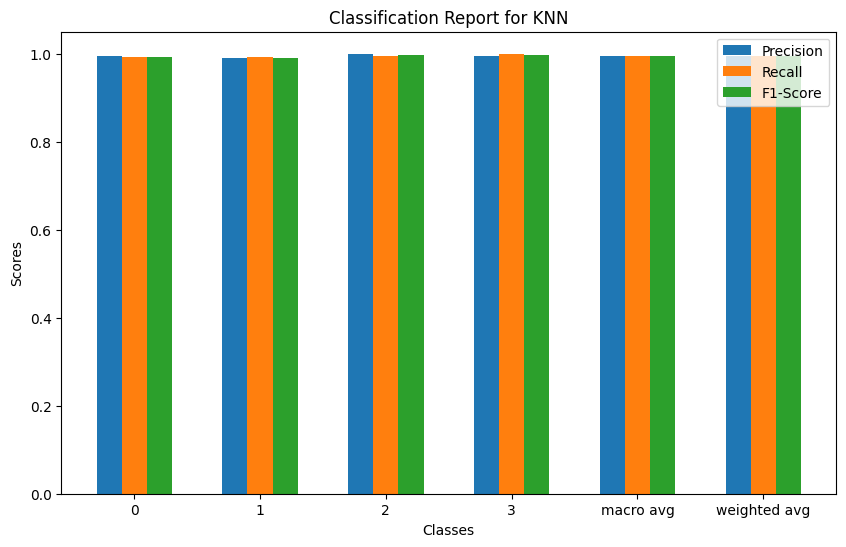

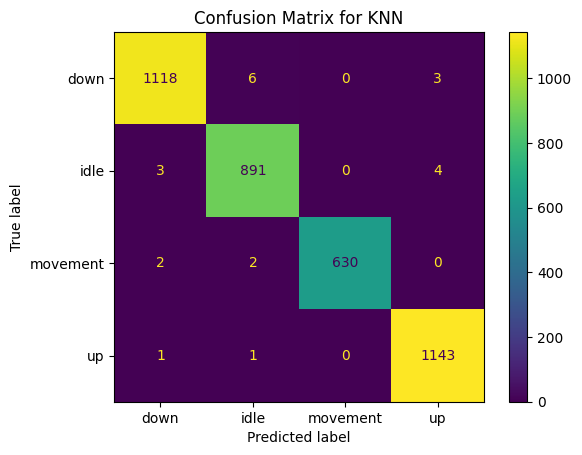


Validating model: SVM
              precision    recall  f1-score   support

           0  1.00000000 0.99556344 0.99777679      1127
           1  0.96966414 0.99665924 0.98297639       898
           2  1.00000000 0.98895899 0.99444885       634
           3  0.99734982 0.98602620 0.99165569      1145

    accuracy                      0.99185068      3804
   macro avg  0.99175349 0.99180197 0.99171443      3804
weighted avg  0.99204099 0.99185068 0.99188580      3804



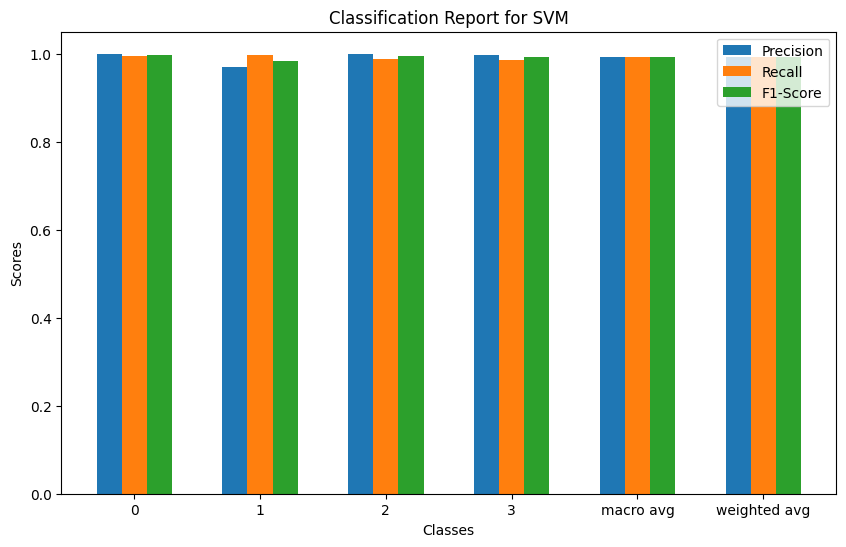

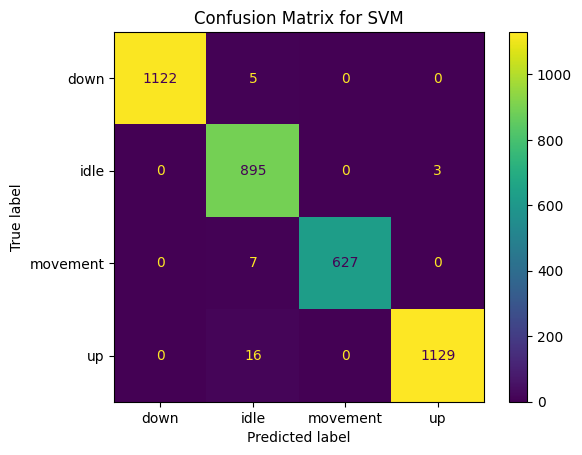


Validating model: Decision Tree
              precision    recall  f1-score   support

           0  1.00000000 0.99822538 0.99911190      1127
           1  0.99667037 1.00000000 0.99833241       898
           2  1.00000000 0.99842271 0.99921073       634
           3  1.00000000 1.00000000 1.00000000      1145

    accuracy                      0.99921136      3804
   macro avg  0.99916759 0.99916202 0.99916376      3804
weighted avg  0.99921398 0.99921136 0.99921168      3804



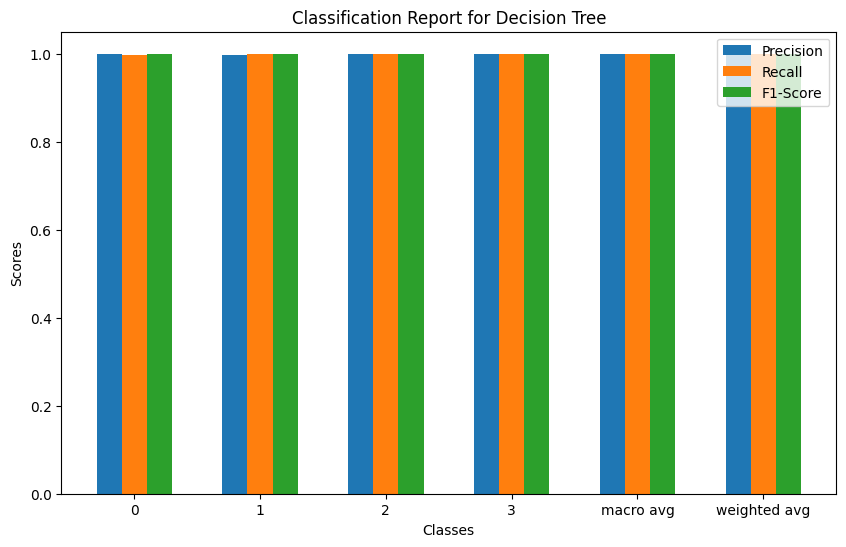

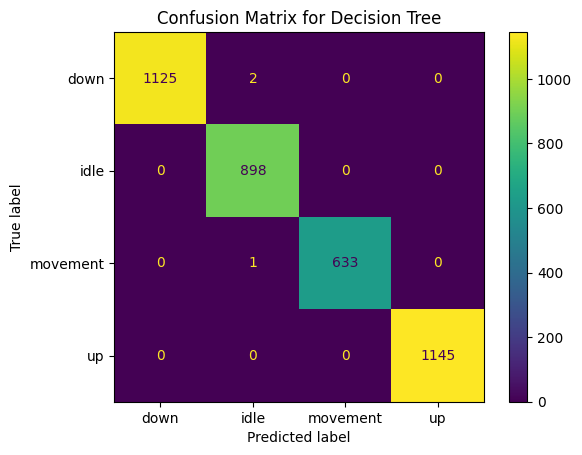


Validating model: MLP
              precision    recall  f1-score   support

           0  0.99911190 0.99822538 0.99866844      1127
           1  0.99888143 0.99443207 0.99665179       898
           2  1.00000000 0.99842271 0.99921073       634
           3  0.99391833 0.99912664 0.99651568      1145

    accuracy                      0.99763407      3804
   macro avg  0.99797792 0.99755170 0.99776166      3804
weighted avg  0.99764225 0.99763407 0.99763478      3804



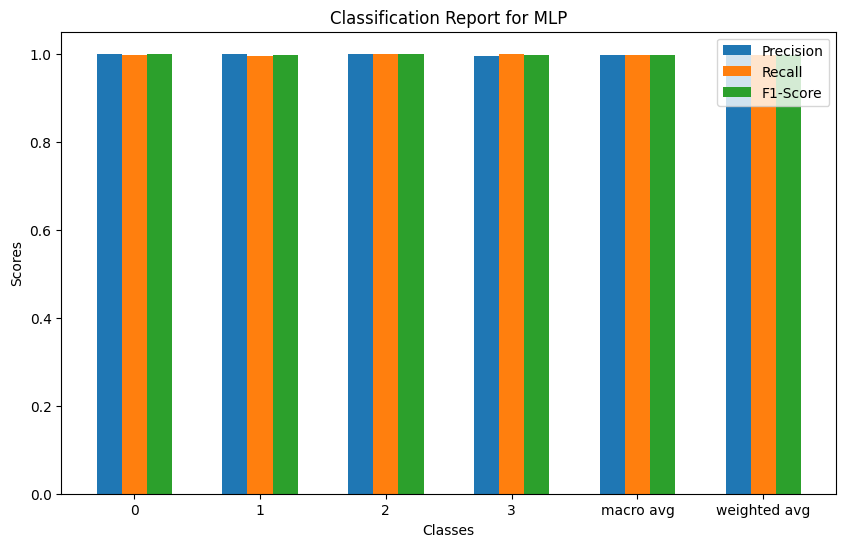

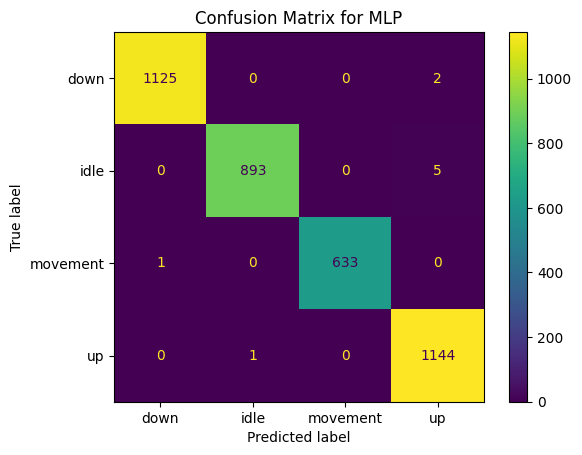

In [5]:
import joblib
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load saved models
models = {
    "KNN": joblib.load("/content/drive/MyDrive/Paper_1_dataset/knn_model.pkl"),
    "SVM": joblib.load("/content/drive/MyDrive/Paper_1_dataset/svm_model.pkl"),
    "Decision Tree": joblib.load("/content/drive/MyDrive/Paper_1_dataset/dt_model.pkl"),
    "MLP": joblib.load("/content/drive/MyDrive/Paper_1_dataset/mlp_model.pkl"),
}

# Step 2: Validate and visualize classification reports
def visualize_classification_report(y_true, y_pred, model_name):
    """Visualize classification report as a bar chart."""
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics = ["precision", "recall", "f1-score", "support"]

    # Filter out average metrics
    class_metrics = {k: v for k, v in report.items() if isinstance(v, dict)}

    # Prepare data for plotting
    classes = list(class_metrics.keys())
    x = np.arange(len(classes))
    width = 0.2

    precision = [class_metrics[c]["precision"] for c in classes]
    recall = [class_metrics[c]["recall"] for c in classes]
    f1_score = [class_metrics[c]["f1-score"] for c in classes]

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x - width, precision, width, label="Precision")
    plt.bar(x, recall, width, label="Recall")
    plt.bar(x + width, f1_score, width, label="F1-Score")

    plt.xlabel("Classes")
    plt.ylabel("Scores")
    plt.title(f"Classification Report for {model_name}")
    plt.xticks(x, classes)
    plt.legend()
    plt.show()

# Step 3: Perform validation and visualization
for model_name, model in models.items():
    print(f"\nValidating model: {model_name}")

    # Predict on the validation set
    y_val_pred = model.predict(X_test_flat)

    # Print and visualize classification report
    print(classification_report(y_test, y_val_pred, digits=8))
    visualize_classification_report(y_test, y_val_pred, model_name)

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_val_pred)
    ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


## Check for overfitting

In [6]:
import joblib
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load saved models
models = {
    "KNN": joblib.load("/content/drive/MyDrive/Paper_1_dataset/knn_model.pkl"),
    "SVM": joblib.load("/content/drive/MyDrive/Paper_1_dataset/svm_model.pkl"),
    "Decision Tree": joblib.load("/content/drive/MyDrive/Paper_1_dataset/dt_model.pkl"),
    "MLP": joblib.load("/content/drive/MyDrive/Paper_1_dataset/mlp_model.pkl"),
}

# Function to calculate and compare performance on train and test data
def check_overfitting(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\nEvaluating {model_name} for overfitting:")

    # Predict on train set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_report = classification_report(y_train, y_train_pred, digits=6)

    # Predict on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred, digits=6)

    # Print accuracy comparison
    print(f"Train Accuracy: {train_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")

    # Check for overfitting
    if train_accuracy - test_accuracy > 0.1:
        print(f"⚠️ Warning: {model_name} may be overfitting (Train-Test Accuracy Gap: {train_accuracy - test_accuracy:.6f})")
    else:
        print(f"✅ {model_name} does not show significant overfitting.")

    # Print detailed reports
    print("\nTrain Classification Report:")
    print(train_report)
    print("\nTest Classification Report:")
    print(test_report)

# Step 2: Check overfitting for each model
for model_name, model in models.items():
    check_overfitting(model, model_name, X_train_flat, y_train, X_test_flat, y_test)



Evaluating KNN for overfitting:
Train Accuracy: 0.996676
Test Accuracy: 0.994217
✅ KNN does not show significant overfitting.

Train Classification Report:
              precision    recall  f1-score   support

           0   0.997633  0.996258  0.996945      5077
           1   0.993626  0.996685  0.995153      4223
           2   0.996681  0.996681  0.996681      3013
           3   0.998159  0.997058  0.997609      5439

    accuracy                       0.996676     17752
   macro avg   0.996525  0.996670  0.996597     17752
weighted avg   0.996680  0.996676  0.996677     17752


Test Classification Report:
              precision    recall  f1-score   support

           0   0.994662  0.992014  0.993336      1127
           1   0.990000  0.992205  0.991101       898
           2   1.000000  0.993691  0.996835       634
           3   0.993913  0.998253  0.996078      1145

    accuracy                       0.994217      3804
   macro avg   0.994644  0.994041  0.994338      3804